In [273]:
from PIL import Image

Kiểm tra phân bố các class của data

<Axes: title={'center': 'Phân bố của các class trong folder ImageForClassify'}, xlabel='label', ylabel='Count'>

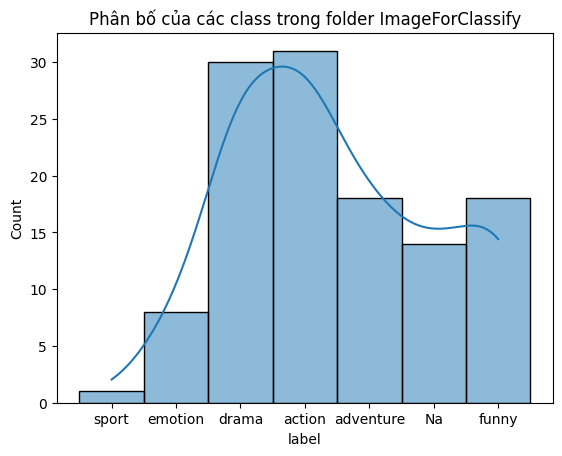

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_label_img = pd.read_csv('./reverse_anime_label.csv')
plt.title("Phân bố của các class trong folder ImageForClassify")
sns.histplot(my_label_img['label'],kde=True,)

In [275]:
batch_size = 32
img_width = 180
img_height = 180

In [276]:
import os
from PIL import Image

def resize_image(image_path, output_path, width, height):
    image = Image.open(image_path)
    resized_image = image.resize((width, height), Image.ANTIALIAS)
    resized_image.save(output_path)

my_class = "sport"
input_path = "./ImageForclassify/{}".format(my_class)  # Path to the directory containing the images
output_path = "./ImageForclassify/{}".format(my_class)  # Path to the directory where the resized images will be saved
width = img_width  # Target width for the resized images
height = img_height  # Target height for the resized images

if not os.path.exists(output_path):
    os.makedirs(output_path)

for filename in os.listdir(input_path):
    image_path = os.path.join(input_path, filename)
    output_filename = os.path.join(output_path, filename)
    resize_image(image_path, output_filename, width, height)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21732\699563250.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((width, height), Image.ANTIALIAS)


In [277]:
Image.open('./ImageForclassify/adventure/14.jpg').size

(180, 180)

In [278]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [279]:
data_dir = './ImageForclassify/'

In [280]:
train_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 7 classes.
Using 96 files for training.


In [281]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 7 classes.
Using 24 files for validation.


In [282]:
#! lload input image:
class_names = train_ds.class_names
print(class_names)

['action', 'adventure', 'drama', 'emotion', 'funny', 'notknow', 'sport']


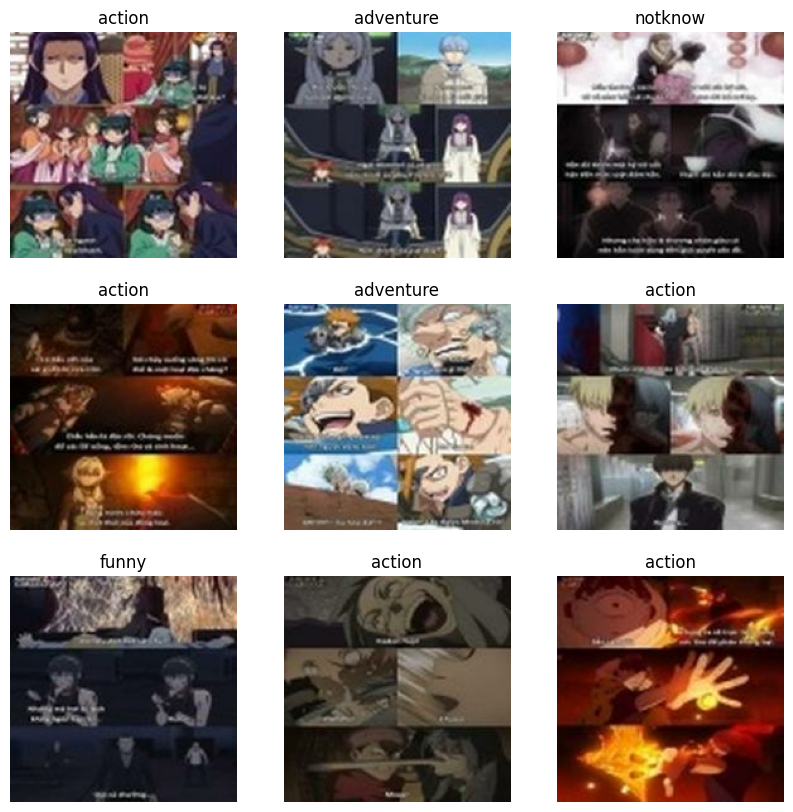

In [283]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [284]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [285]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(50).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [286]:
normalization_layer = layers.Rescaling(1./255)

In [287]:
num_classes = len(class_names)

In [288]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [289]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [290]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_28 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 45, 45, 64)      

In [291]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 1s 213ms/step - loss: 2.5139 - accuracy: 0.2188 - val_loss: 2.1005 - val_accuracy: 0.1667
Epoch 2/10


3/3 [==============================] - 0s 134ms/step - loss: 1.8310 - accuracy: 0.2500 - val_loss: 1.8334 - val_accuracy: 0.2083
Epoch 3/10
3/3 [==============================] - 0s 139ms/step - loss: 1.7085 - accuracy: 0.3438 - val_loss: 2.0584 - val_accuracy: 0.1667
Epoch 4/10
3/3 [==============================] - 0s 134ms/step - loss: 1.6661 - accuracy: 0.4271 - val_loss: 2.1844 - val_accuracy: 0.0833
Epoch 5/10
3/3 [==============================] - 0s 145ms/step - loss: 1.5334 - accuracy: 0.4583 - val_loss: 2.1656 - val_accuracy: 0.0833
Epoch 6/10
3/3 [==============================] - 0s 149ms/step - loss: 1.4123 - accuracy: 0.4688 - val_loss: 2.4706 - val_accuracy: 0.0833
Epoch 7/10
3/3 [==============================] - 0s 146ms/step - loss: 1.3070 - accuracy: 0.5104 - val_loss: 2.4187 - val_accuracy: 0.2083
Epoch 8/10
3/3 [==============================] - 0s 126ms/step - loss: 1.1697 - accuracy: 0.6042 - val_loss: 2.4810 - val_accuracy: 0.1250
Epoch 9/10
3/3 [===============

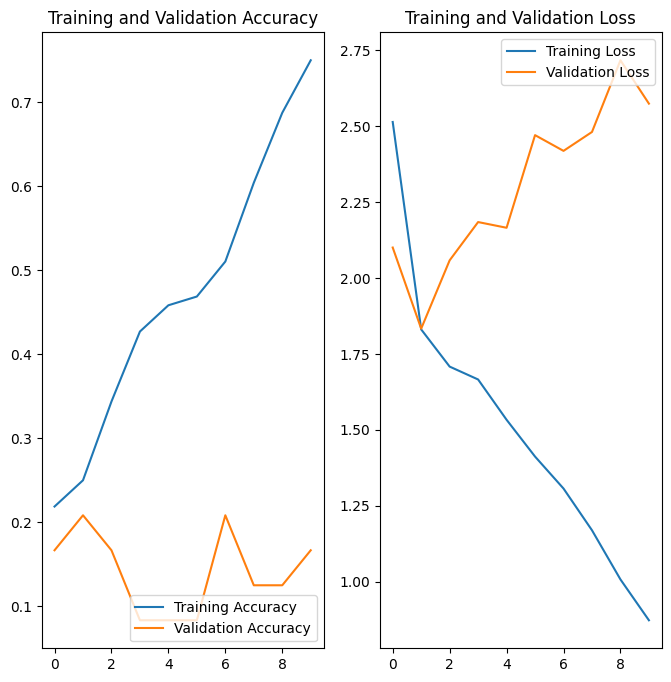

In [292]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [293]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

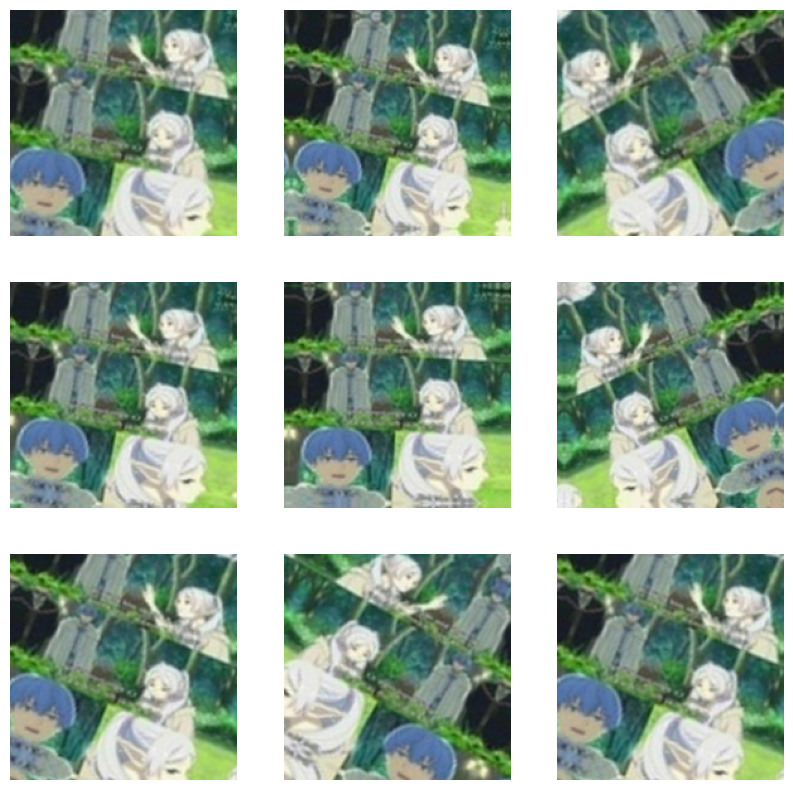

In [294]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [295]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [296]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [297]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_29 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_29 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                               

In [298]:
epochs = 12
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/12


3/3 [==============================] - 2s 241ms/step - loss: 2.0333 - accuracy: 0.2396 - val_loss: 2.3708 - val_accuracy: 0.0833
Epoch 2/12
3/3 [==============================] - 1s 178ms/step - loss: 1.9111 - accuracy: 0.3438 - val_loss: 1.9978 - val_accuracy: 0.0833
Epoch 3/12
3/3 [==============================] - 0s 163ms/step - loss: 1.7867 - accuracy: 0.3021 - val_loss: 2.2841 - val_accuracy: 0.0833
Epoch 4/12
3/3 [==============================] - 0s 168ms/step - loss: 1.6912 - accuracy: 0.3021 - val_loss: 1.9415 - val_accuracy: 0.1250
Epoch 5/12
3/3 [==============================] - 0s 157ms/step - loss: 1.6653 - accuracy: 0.3021 - val_loss: 2.1156 - val_accuracy: 0.0833
Epoch 6/12
3/3 [==============================] - 0s 156ms/step - loss: 1.6288 - accuracy: 0.2812 - val_loss: 2.1096 - val_accuracy: 0.1250
Epoch 7/12
3/3 [==============================] - 0s 155ms/step - loss: 1.5864 - accuracy: 0.3750 - val_loss: 2.0212 - val_accuracy: 0.2083
Epoch 8/12
3/3 [===============

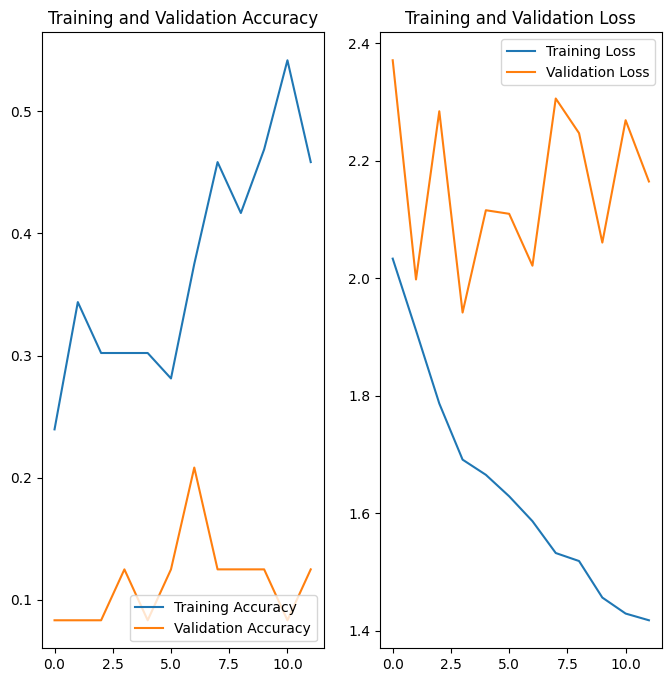

In [299]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [300]:
import numpy as np
from numpy import asarray
img = Image.open('./ImageForclassify/adventure/16.jpg')
img_array = asarray(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
#print(score)

1/1 [==============================] - 0s 468ms/step
This image most likely belongs to adventure with a 61.69 percent confidence.
